In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Tuberclosis.zip -d /content/drive/MyDrive/Tuberclosis_data

In [ ]:
import tensorflow as tf

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
TRAIN_SIZE = 0.8
VAL_SIZE = 0.1

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Tuberclosis_data/Tuberclosis/TB_Chest_Radiography_Database",  # Path to the dataset
    shuffle = True,  # Shuffle the data
    image_size = IMAGE_SIZE,  # Resize the images to the target size
    batch_size = BATCH_SIZE  # Set the batch size
)

Found 4200 files belonging to 2 classes.


In [ ]:
# Calculate the dataset lengths
len(dataset)  # Total number of batches

132

In [ ]:
dataset.class_names

['Normal', 'Tuberculosis']

In [ ]:
len(dataset)*TRAIN_SIZE

105.60000000000001

In [ ]:
train_batches = dataset.take(105)  # 80% for training

In [ ]:
len(train_batches)

105

In [ ]:
test_plus_val_ds = dataset.skip(105) # 106 se 132 tk ke batches in test

In [ ]:
len(test_plus_val_ds)

27

In [ ]:
len(dataset)*VAL_SIZE # 10 % of the dataset

13.200000000000001

In [ ]:
val_batches = test_plus_val_ds.take(13) # original me 106 to 119 comes in val

In [ ]:
len(val_batches)

13

In [ ]:
test_batches = test_plus_val_ds.skip(13) # so remaining 14 to 27 batches (original me 119 to 132 batches goes in testing)

In [ ]:
len(test_batches)

14

In [ ]:
105 + 13 + 14

132

In [ ]:
train_batches = train_batches.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_batches = val_batches.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_batches = test_batches.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Resize and rescale layer : altough not using, not required
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(224, 224),  # Directly access Resizing
    layers.Rescaling(1.0 / 255)  # Directly access Rescaling
])

In [ ]:
# Data augmentation layer , not using right now, just defined
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Directly access RandomFlip
    layers.RandomRotation(0.2)  # Directly access RandomRotation
])

In [ ]:
# same thing writting again
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Load the pre-trained ResNet50 model without the top layer
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Freeze the base ResNet50 model to avoid training its weights
resnet50_base.trainable = False

# Create a new model using ResNet50 as the base
model = models.Sequential([
    resnet50_base,  # Pre-trained ResNet50
    layers.GlobalAveragePooling2D(),  # Global pooling to reduce dimensions
    layers.Dense(64, activation='relu'),  # One hidden dense layer
    layers.Dense(n_classes, activation='softmax')  # Output layer for classification
])

# Build the model (optional step for Sequential models)
model.build(input_shape = input_shape)

# Print the model summary to check the architecture
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (32, 7, 7, 2048)            │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (32, 2048)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,718,978 (90.48 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_batches,
    batch_size=BATCH_SIZE,
    validation_data=val_batches,
    verbose=1,
    epochs=5,
)

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 87s 446ms/step - accuracy: 0.8831 - loss: 0.2801 - val_accuracy: 0.9880 - val_loss: 0.0334
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9861 - loss: 0.0402 - val_accuracy: 0.9952 - val_loss: 0.0151
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9952 - loss: 0.0181 - val_accuracy: 0.9976 - val_loss: 0.0167
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9966 - loss: 0.0141 - val_accuracy: 0.9976 - val_loss: 0.0071
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9982 - loss: 0.0096 - val_accuracy: 0.9952 - val_loss: 0.0071


In [ ]:
scores = model.evaluate(test_batches)

14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 298ms/step - accuracy: 0.9931 - loss: 0.0183


In [ ]:
scores # loss, accuracy

[0.01688382960855961, 0.9929245114326477]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation accuracy wrt EPOCHS')

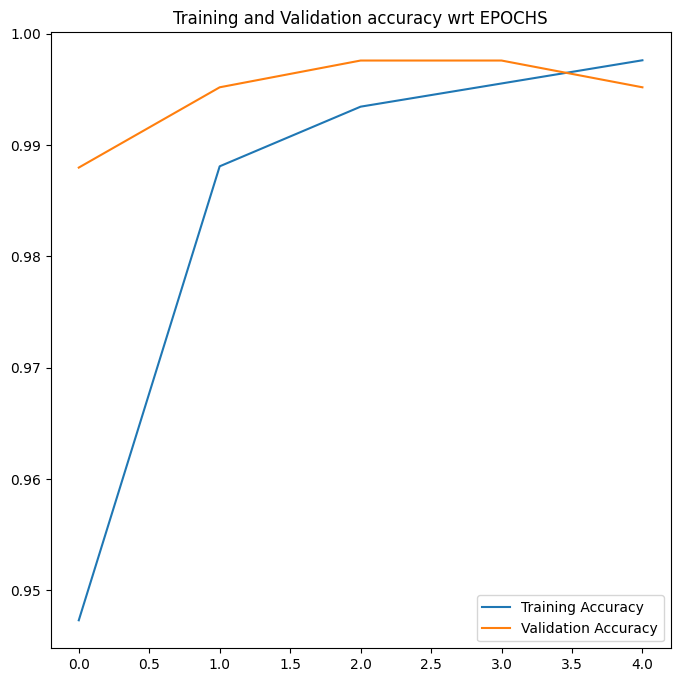

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
plt.plot(range(5),acc,label='Training Accuracy')
plt.plot(range(5), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training and Validation accuracy wrt EPOCHS")


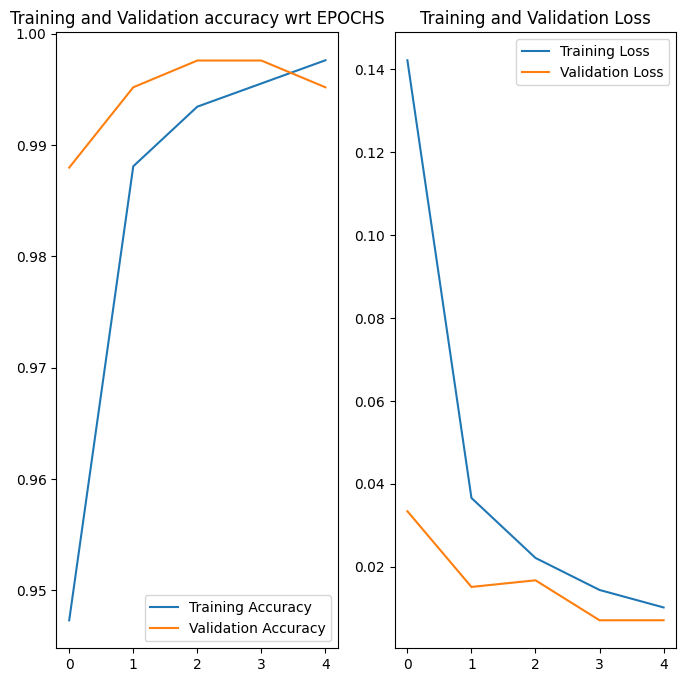

In [ ]:
EPOCHS = 5
plt.figure(figsize=(8,8))
plt.subplot(1,2,1) # 1 row, 2 column me 1st
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training and Validation accuracy wrt EPOCHS")

plt.subplot(1,2,2) # 1 row , 2 column me 2nd
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# clearly after 20 epochs, accuracy = 100% and loss is 0

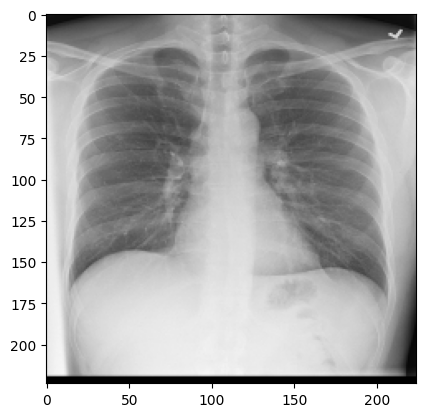

In [ ]:
for images_batch, labels_batch in test_batches.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))

In [ ]:
class_names = dataset.class_names

first image to predict
first_image's actual label: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[9.999958e-01 4.119791e-06]
[9.999958e-01 4.119791e-06]
Predicted label Normal


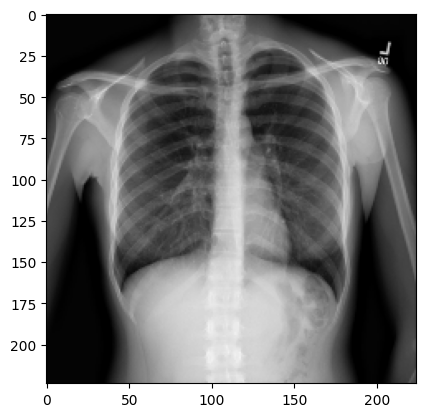

In [ ]:
for images_batch, labels_batch in test_batches.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0]

  print("first image to predict")
  plt.imshow(first_image)
  print("first_image's actual label:",class_names[first_label])

  # predicted label
  batch_prediction = model.predict(images_batch)
  print(batch_prediction[0])

  print(batch_prediction[0]) #softmax probability dega, max prob will be the ans
  import numpy as np
  print("Predicted label",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0) # create a batch

  predictions = model.predict(img_array)
  prediction_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])), 2)
  return prediction_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


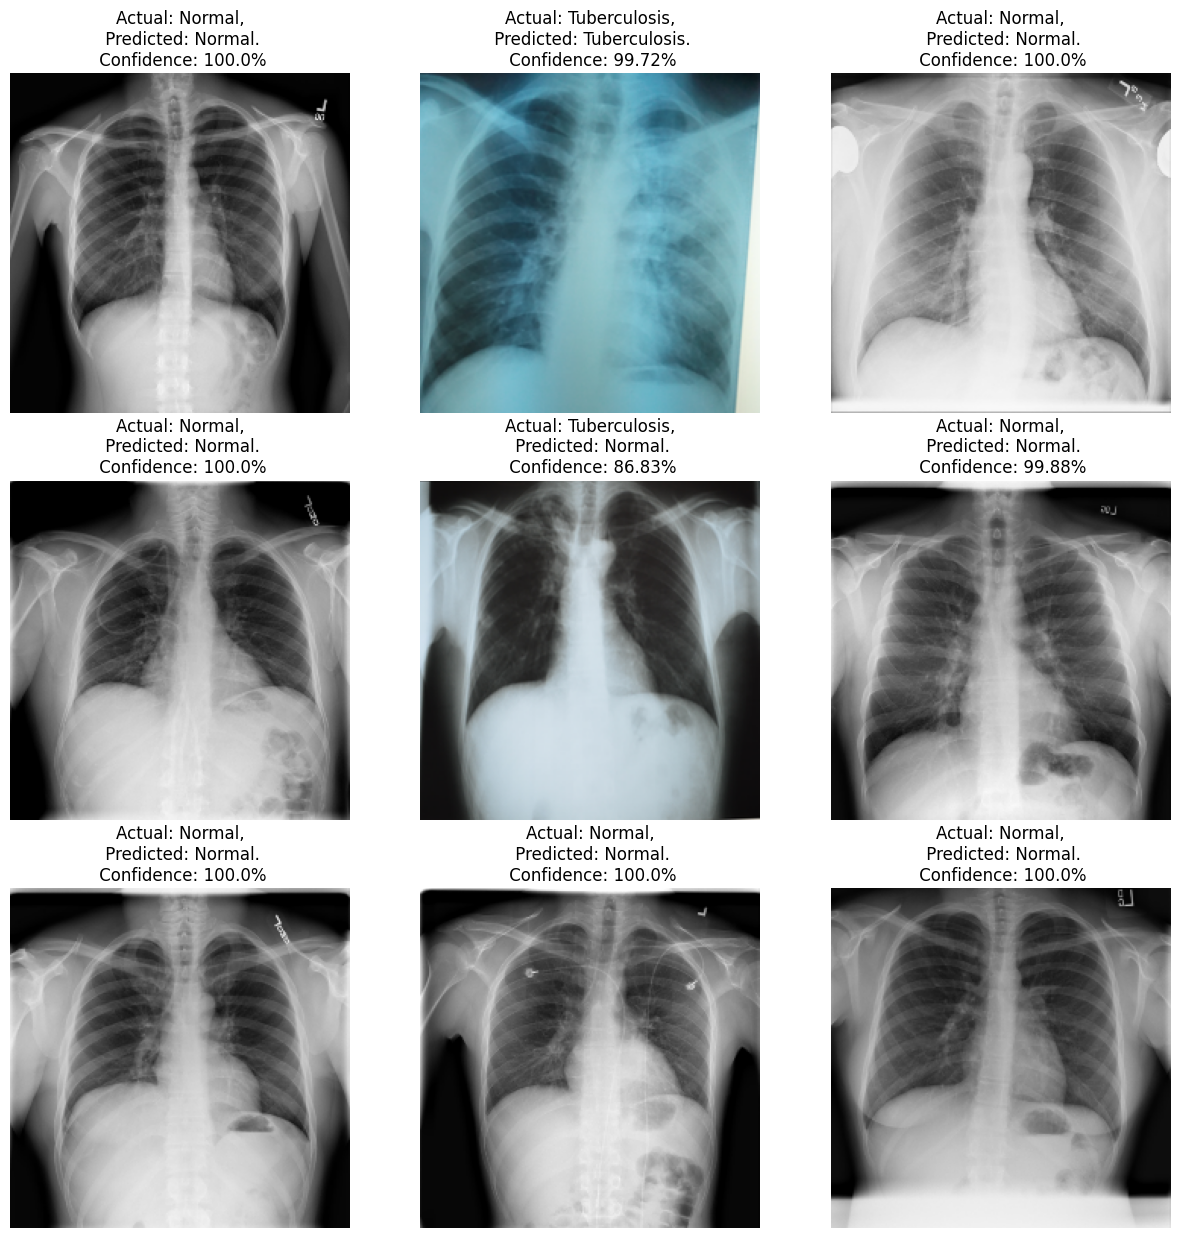

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_batches.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


In [ ]:
# Specify the model version
model_version = 1

# Save the model to Google Drive with the recommended `.keras` extension
model.save(f"/content/drive/MyDrive/models/{model_version}.keras")  # Saves as '1.keras' or 1.h5 also can be used

# Specify the next model version (if you make changes)
model_version = 2

# Save the updated model to Google Drive with the same format
model.save(f"/content/drive/MyDrive/models/{model_version}.h5")  # Saves as '2.keras' or 2,h5
